In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

581

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb7e913b60509fb0b1fc7097ce6c2652


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
   # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------") 


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sambava
Processing Record 2 of Set 1 | sao filipe
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | amderma
City not found. Skipping...
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | chokurdakh
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | tasiilaq
Processing Record 9 of Set 1 | atyashevo
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | kodiak
Processing Record 15 of Set 1 | maridi
Processing Record 16 of Set 1 | ust-kuyga
Processing Record 17 of Set 1 | kaitangata
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | ostrovnoy
Processing Record 20 of Set 1 | nova vicosa
Processing Record 21 of Set 1 | huarmey
Processing Record 22 of Set 1 | punta arenas
Processing Record 

City not found. Skipping...
Processing Record 39 of Set 4 | capari
Processing Record 40 of Set 4 | saint george
Processing Record 41 of Set 4 | visnes
Processing Record 42 of Set 4 | tabuk
Processing Record 43 of Set 4 | goderich
Processing Record 44 of Set 4 | baoning
Processing Record 45 of Set 4 | abha
Processing Record 46 of Set 4 | garissa
Processing Record 47 of Set 4 | bengkulu
Processing Record 48 of Set 4 | zaros
Processing Record 49 of Set 4 | nome
Processing Record 50 of Set 4 | rolla
Processing Record 1 of Set 5 | el tocuyo
Processing Record 2 of Set 5 | iquitos
Processing Record 3 of Set 5 | datong
Processing Record 4 of Set 5 | fare
Processing Record 5 of Set 5 | chumikan
Processing Record 6 of Set 5 | esperance
Processing Record 7 of Set 5 | cayenne
Processing Record 8 of Set 5 | bambous virieux
Processing Record 9 of Set 5 | lompoc
Processing Record 10 of Set 5 | salalah
Processing Record 11 of Set 5 | kingisepp
Processing Record 12 of Set 5 | nouadhibou
Processing Reco

Processing Record 29 of Set 8 | touros
Processing Record 30 of Set 8 | povenets
Processing Record 31 of Set 8 | moron
Processing Record 32 of Set 8 | loknya
Processing Record 33 of Set 8 | hailar
Processing Record 34 of Set 8 | chicama
Processing Record 35 of Set 8 | kifri
Processing Record 36 of Set 8 | barcelona
Processing Record 37 of Set 8 | flagstaff
Processing Record 38 of Set 8 | toktogul
Processing Record 39 of Set 8 | canning
Processing Record 40 of Set 8 | vinukonda
Processing Record 41 of Set 8 | port blair
Processing Record 42 of Set 8 | champerico
Processing Record 43 of Set 8 | erdenet
Processing Record 44 of Set 8 | ileza
Processing Record 45 of Set 8 | high level
Processing Record 46 of Set 8 | banda aceh
Processing Record 47 of Set 8 | manzanillo
Processing Record 48 of Set 8 | antri
Processing Record 49 of Set 8 | lilongwe
Processing Record 50 of Set 8 | mwinilunga
Processing Record 1 of Set 9 | keti bandar
Processing Record 2 of Set 9 | norrtalje
Processing Record 3 

City not found. Skipping...
Processing Record 19 of Set 12 | safwah
City not found. Skipping...
Processing Record 20 of Set 12 | lotoshino
Processing Record 21 of Set 12 | maravilha
Processing Record 22 of Set 12 | dawlatabad
Processing Record 23 of Set 12 | la ligua
Processing Record 24 of Set 12 | kalmar
Processing Record 25 of Set 12 | pankrushikha
Processing Record 26 of Set 12 | gberia fotombu
Processing Record 27 of Set 12 | tripoli
Processing Record 28 of Set 12 | komsomolskiy
Processing Record 29 of Set 12 | labuhan
Processing Record 30 of Set 12 | yarovoye
Processing Record 31 of Set 12 | katsiveli
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------


In [10]:
len(city_data)

536

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sambava,-14.2667,50.1667,81.28,73,100,3.89,MG,2021-01-26 15:02:23
1,Sao Filipe,14.8961,-24.4956,76.84,59,0,6.33,CV,2021-01-26 15:09:15
2,Hilo,19.7297,-155.0900,73.40,78,90,8.05,US,2021-01-26 14:57:06
3,Ribeira Grande,38.5167,-28.7000,64.40,88,75,24.16,PT,2021-01-26 15:01:48
4,Chokurdakh,70.6333,147.9167,-34.92,79,71,4.00,RU,2021-01-26 15:01:53
5,Albany,42.6001,-73.9662,25.00,54,44,3.71,US,2021-01-26 15:01:45
6,Tasiilaq,65.6145,-37.6368,6.80,56,40,16.11,GL,2021-01-26 15:02:03
7,Atyashevo,54.5644,46.0691,28.22,98,100,15.10,RU,2021-01-26 15:09:16
8,Rikitea,-23.1203,-134.9692,78.94,73,0,13.60,PF,2021-01-26 15:01:40
9,Hermanus,-34.4187,19.2345,75.00,65,11,1.99,ZA,2021-01-26 15:01:49


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sambava,MG,2021-01-26 15:02:23,-14.2667,50.1667,81.28,73,100,3.89
1,Sao Filipe,CV,2021-01-26 15:09:15,14.8961,-24.4956,76.84,59,0,6.33
2,Hilo,US,2021-01-26 14:57:06,19.7297,-155.0900,73.40,78,90,8.05
3,Ribeira Grande,PT,2021-01-26 15:01:48,38.5167,-28.7000,64.40,88,75,24.16
4,Chokurdakh,RU,2021-01-26 15:01:53,70.6333,147.9167,-34.92,79,71,4.00
5,Albany,US,2021-01-26 15:01:45,42.6001,-73.9662,25.00,54,44,3.71
6,Tasiilaq,GL,2021-01-26 15:02:03,65.6145,-37.6368,6.80,56,40,16.11
7,Atyashevo,RU,2021-01-26 15:09:16,54.5644,46.0691,28.22,98,100,15.10
8,Rikitea,PF,2021-01-26 15:01:40,-23.1203,-134.9692,78.94,73,0,13.60
9,Hermanus,ZA,2021-01-26 15:01:49,-34.4187,19.2345,75.00,65,11,1.99


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

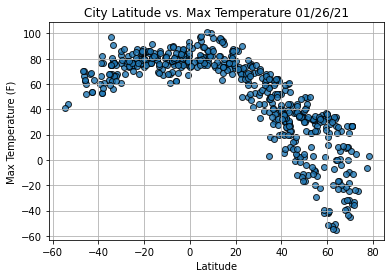

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

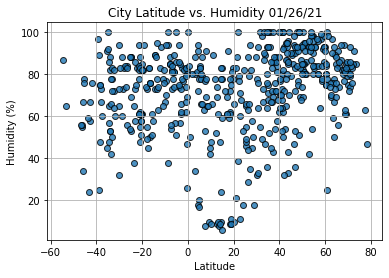

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

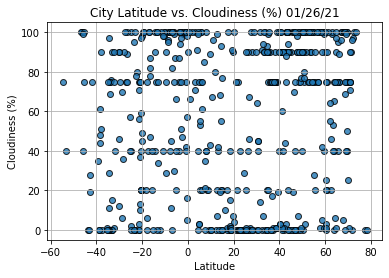

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

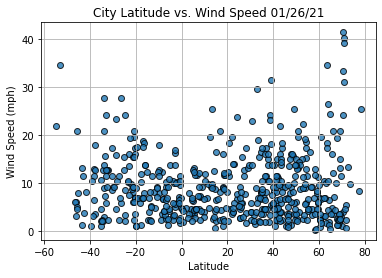

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()